In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import columnas_utils as col
import pandas as pd
%cd ..\..\etabs_oapi
import sismo_utils as sis
import etabs_utils as etb
%cd ..\concreto\columnas

%matplotlib inline
%matplotlib notebook

D:\diseño\programas\ingenieria estructural\etabs_oapi
D:\diseño\programas\ingenieria estructural\concreto\columnas


## Diseño de Columnas según ACI 318-19

In [2]:
# Definicion de las unidades
N = 1
m = 1
cm = 1/100
Pa = 1
MPa = 10**6
pulg = 2.54 / 100

# Definicion de varillas de acero:
d_3 = 3/8 * pulg
d_4 = 1/2 * pulg
d_5 = 5/8 * pulg
d_6 = 3/4 * pulg
d_8 = 1 * pulg

A_3 = d_3 ** 2 /4 * math.pi
A_4 = d_4 ** 2 /4 * math.pi
A_5 = d_5 ** 2 /4 * math.pi
A_6 = d_6 ** 2 /4 * math.pi
A_8 = d_8 ** 2 /4 * math.pi

## Datos de la sección

In [3]:
#Dimensiones de la columna
b = 35*cm
h = 75*cm
r = 4*cm
column = col.Column(b, h, r)

## Materiales

In [4]:
# Concreto
fc = 21*MPa #Resistencia a la compresion
eps_u = 0.003 #Deformación unitaria ultima
column.set_concrete(fc, eps_u)

#Acero de refuerzo
fy = 420*MPa #Esfuerzo a la fluencia del acero
Es = 200000*MPa #Módulo de elasticidad del acero
eps_y = fy/Es #Deformación de fluencia del acero
column.set_steel_reb(fy, Es)

## Acero de Refuerzo Colocado

In [5]:
d_p = d_5 #diámetro principal
d_s = d_5 #diámetro secundario
d_st = d_3 #diámetro del estribo
n_f = 6  #filas de acero
n_c = 3 #columnas de acero
column.set_rebar(d_p, d_s, d_st, n_f, n_c)

## Resistencia a la compresión pura de la Columna

In [6]:
#factor de minoración
phi = 0.65
column.compress_resist(phi)
print('Resistencia a la compresión pura reducida: {:.2f} N'.format(column.phiP_n))

Resistencia a la compresión pura reducida: 3016002.80 N


## Diseño a Flexocompresión

In [7]:
#Importación de cargas
cargas = pd.read_csv('cargas.csv',sep=';')

#Conversion de unidades
cargas.P = cargas.P*9.81*10**3
cargas.M2 = cargas.M2*9.81*10**3
cargas.M3 = cargas.M3*9.81*10**3

In [8]:
cargas

,Combinacion,Piso,Ubicacion,P,M2,M3
0,1.4D,6,up,-127502.532,-13109.103,-37897.992
1,1.4D,6,down,-110630.313,10006.200,56115.162
2,1.4D,5,up,-277824.105,-10789.038,-43266.024
3,1.4D,5,down,-260951.886,4777.470,28345.014
4,1.4D,4,up,-429920.307,-8866.278,-45508.590
...,...,...,...,...,...,...
115,0.792D+SY MIN,3,down,-436245.795,-11124.540,-54828.090
116,0.792D+SY MIN,2,up,-583757.784,-27231.579,-76925.115
117,0.792D+SY MIN,2,down,-574212.654,-12416.517,-68925.060
118,0.792D+SY MIN,1,up,-740313.612,-36400.005,-371982.447


In [9]:
#Diagrama de flexocompresión:
column.biaxial_flex_comp()

In [10]:
#Datos generados:
column.biaxial_f_c

,theta,a,Pn,phi_Pn,Mn_x,phi_Mn_x,Mn_y,phi_Mn_y,phi,A_c,x_c,y_c
0,0.0,0.0000,-1.163844e+06,-1.047459e+06,-1.455192e-11,-1.309672e-11,2.910383e-11,2.619345e-11,0.90,0.000000,0.00000,0.37500
1,0.0,0.0035,-1.116987e+06,-1.005289e+06,8.117845e+03,7.306061e+03,2.910383e-11,2.619345e-11,0.90,0.002625,0.00175,0.37500
2,0.0,0.0070,-1.070131e+06,-9.631181e+05,1.607169e+04,1.446452e+04,2.910383e-11,2.619345e-11,0.90,0.005250,0.00350,0.37500
3,0.0,0.0105,-1.023275e+06,-9.209475e+05,2.386155e+04,2.147539e+04,2.910383e-11,2.619345e-11,0.90,0.007875,0.00525,0.37500
4,0.0,0.0140,-9.764187e+05,-8.787769e+05,3.148740e+04,2.833866e+04,2.910383e-11,2.619345e-11,0.90,0.010500,0.00700,0.37500
...,...,...,...,...,...,...,...,...,...,...,...,...
3126,90.0,0.7200,5.322530e+06,3.016003e+06,1.136868e-11,7.389644e-12,1.449258e+05,9.420178e+04,0.65,0.252000,0.17500,0.36000
3127,90.0,0.7275,5.376192e+06,3.016003e+06,1.182343e-11,7.685230e-12,1.272964e+05,8.274264e+04,0.65,0.254625,0.17500,0.36375
3128,90.0,0.7350,5.429715e+06,3.016003e+06,1.182343e-11,7.685230e-12,1.093418e+05,7.107217e+04,0.65,0.257250,0.17500,0.36750
3129,90.0,0.7425,5.483104e+06,3.016003e+06,1.136868e-11,7.389644e-12,9.106129e+04,5.918984e+04,0.65,0.259875,0.17500,0.37125


<IPython.core.display.Javascript object>


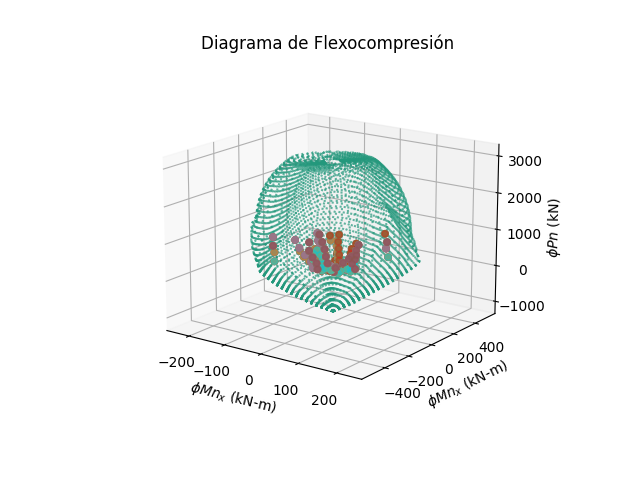

In [11]:
#Diagrama a flexocompresión
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
column.plot_bi_f_c(ax,loads=cargas)
plt.title('Diagrama de Flexocompresión')
ax.set_xlabel("$\phi Mn_x$ (kN-m)")
ax.set_ylabel("$\phi Mn_x$ (kN-m)")
ax.set_zlabel("$\phi Pn$ (kN)")
plt.show()

<IPython.core.display.Javascript object>


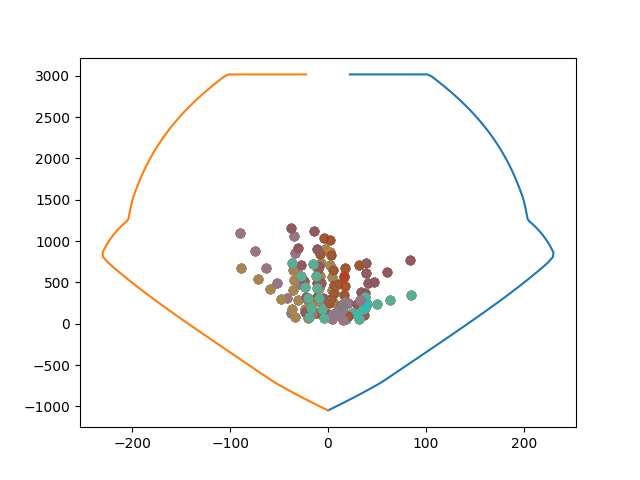

In [12]:
fig, ax = plt.subplots()
column.plot_f_c(ax,loads=cargas,axis='x')
plt.show()

<IPython.core.display.Javascript object>


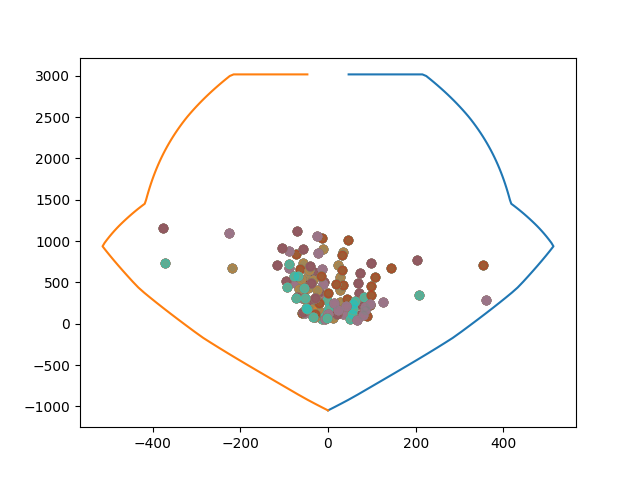

In [13]:
fig, ax = plt.subplots()
column.plot_f_c(ax,loads=cargas,axis='y')
plt.show()

## Comprobación Viga débil Columna Fuerte

La resistencia a la flexión de las columnas debe ser por lo menos 6/5 de la resistencia a la flexion de la viga que se apoya en ella:

$ \hspace{5.5cm} \Sigma M_{nc} \geq (6/5) \Sigma M_{nb} $

In [14]:
#Datos de la viga
viga_1 = col.Beam(b=25*cm,h=40*cm,r=9*cm)
viga_1.set_rebar(d_s=d_5, n_s=4)

#Momento Resistente máximo con acero en tracción solamente
As = viga_1.Ast
fy = viga_1.fy
fc = viga_1.fc
b = viga_1.b
d = viga_1.d
phi_f = 0.9
viga_1.a = As*fy/(0.5*fc*b)
viga_1.Mn = As*fy*(d-viga_1.a/2)
viga_1.phi_Mn = phi_f*viga_1.Mn

In [15]:
#Elegimos la menor carga que no se encuentra en el último nivel
P_min = cargas[cargas.Piso!=6]['P'].max()*-1

#Filtro de datos para la menor carga
data = column.biaxial_f_c
data = data[data.theta==0]
data = data[abs(data.Pn-P_min)== min(abs(data.Pn-P_min))]

#Momento de diseño
Mnx_des = float(data.Mn_x)

#Verificación:
if 2*Mnx_des > 1.2*(2*viga_1.Mn):
    print('OK')
else:
    print('Viga más fuerte que la columna')

OK


## Desarrollo del acero en la columna
A lo largo de la altura libre de la columna, el refuerzo longitudinal debe seleccionarse de manera que:

$\hspace{5cm} 1.25\cdot l_d = l_u/2 $
- $l_u$ luz libre de la columna
- $l_d $ longitud de desarrollo del acero

In [16]:
#Cálculo de la longitud de desarrollo sin considerar confinamiento de estribos
lu = 1.95*m
lamb = 1
psi_g = 1
psi_e = 1
psi_s1 = 1
psi_s2 = 0.8
psi_ts = 1.3
psi_ti = 1
db = 0.75 * pulg

psi_ts_e = psi_ts*psi_e 
if psi_ts_e > 1.7:
    psi_ts_e = 1.7
    
sqrt_fc = (fc/10**6)**0.5*MPa
if sqrt_fc > 8.3*MPa:
   sqrt_fc = 8.3*MPa

ld3 = fy/(1.1*lamb*sqrt_fc)*psi_g*psi_e*psi_s2*psi_g*db
ld3

1.269790065293218

In [17]:
#Considerando el efecto de los estribos:
r = column.r
d_st = column.d_st
nb = column.n_c

cb1 = r+d_st+db*0.5
cb2 = (b-2*r-2*d_st-db)/(nb-1)/2
cb = min(cb1,cb2)

k_tr = 0

#restricciones de la norma
alpha = (cb+k_tr)/db
if alpha > 2.5:
    alpha = 2.5

#Por tanto:
ld3 = ld3/alpha 
ld3

0.7335709095932011

In [18]:
#Verificación
if 1.25*ld3 <= lu/2:
    print('Ok')
else:
    print('El acero no puede desarrolarse en la columna')

Ok


## Diseño de estribos

### Longitud de confinamiento:
Es la longitud $l_o$ medida desde cada cara del nudo a ambos lados de cualquier sección donde pueda ocurrir fluencia por flexión como resultado de desplazamientos laterales que exceden el rango elástico de comportamiento.

In [19]:
hm= 2.1*m
h = column.h
Lo = max(b,h,hm/6,45*cm)
Lo

0.75

### Distribución de los estribos en la sección
La cantidad de refuerzo transversal debe cumplir con le exigido en la tabla 18.7.5.4:
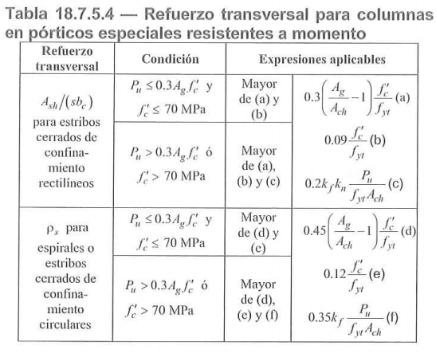

- $k_f$: factor de resistencia del concreto $k_f=\frac{f'_c}{175}+0.6 \geq 1.0$
- $k_n$: factor de efectividad del confinamiento $k_n=\frac{n_l}{nl-2}$
- $n_l$: número de barras longitudinales alrededor del perímetro del núcleo de una columna con estribos cerrados de confinamiento que están soportados lateralmente por una esquina del estribo cerrado de confinamiento con ganchos sísmicos

In [20]:
s = 10*cm #Separación inicial de estribos
bc = b-2*r
hc = h-2*r
Ach = bc*hc
P_max = cargas.P.min()
Ag = column.Ag

#Dirección X:
Ash1 = 0.09*s*bc*fc/fy
Ash2 = 0.3*s*bc*(Ag/Ach-1)*fc/fy
Ash3 = 0
nl = 10
if 0.3*fc*Ag < P_max:
    kf = fc/175+0.6
    if kf < 1.0:
        kf = 1.0 
    kn = nl/(nl-2)
    Ash3 = 0.2*kf*kn*P_max/(fy*Ach)
Ashx = max(Ash1,Ash2,Ash3)
Ashx*10**4

3.326865671641791

In [21]:
#Revisión Y
Ash1 = 0.09*s*hc*fc/fy
Ash2 = 0.3*s*hc*(Ag/Ach-1)*fc/fy
Ash3 = 0
nl = 10
if 0.3*fc*Ag < P_max:
    kf = fc/175+0.6
    if kf < 1.0:
        kf = 1.0 
    kn = nl/(nl-2)
    Ash3 = 0.2*kf*kn*P_max/(fy*Ach)
Ashy = max(Ash1,Ash2,Ash3)
Ashy*10**4

13.111764705882353

In [22]:
#Comprobracion:
Ashpx = 2*A_4 #dos ramas de acero #4
Ashpy = 4*A_3+2*A_4 #dos ramas de acero #4 y cuatro ramas de #3

if Ashpx < Ashx:
    print('Acero insuficiente en X')
else:
    print('Acero colocado en el sentido X: {:.2f} cm^2'.format(Ashpx*10**4))
if Ashpy < Ashy:
    print('Acero insuficiente en Y')
else:
    print('Acero colocado en el sentido Y: {:.2f} cm^2'.format(Ashpy*10**4))

Acero insuficiente en X
Acero insuficiente en Y


### Cortante que toma el acero considerando rótula en la columna

In [23]:
#Diagramas a flexocompresión mayorados

#Momentos en X
flex_comp_data = column.nominal_PM(theta=0,mayored=True)
Pn_x_may = flex_comp_data[0]
Mn_x_may = flex_comp_data[2]

#Momentos en Y
flex_comp_data = column.nominal_PM(theta=90,mayored=True)
Pn_y_may = flex_comp_data[0]
Mn_y_may = flex_comp_data[4]

<IPython.core.display.Javascript object>


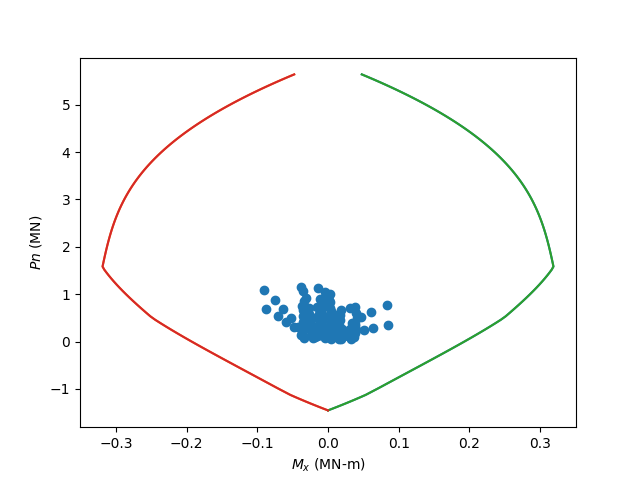

In [24]:
#Diagrama en el eje x    
fig, ax = plt.subplots()
ax.plot(Mn_x_may/10**6, Pn_x_may/10**6)
ax.plot(-Mn_x_may/10**6, Pn_x_may/10**6)
ax.plot(Mn_x_may/10**6, Pn_x_may/10**6)
ax.plot(-Mn_x_may/10**6, Pn_x_may/10**6)
ax.scatter(cargas['M2']/10**6,cargas['P']*-1/10**6)
ax.set_xlabel("$M_x$ (MN-m)")
ax.set_ylabel("$Pn$ (MN)")
plt.show()

<IPython.core.display.Javascript object>


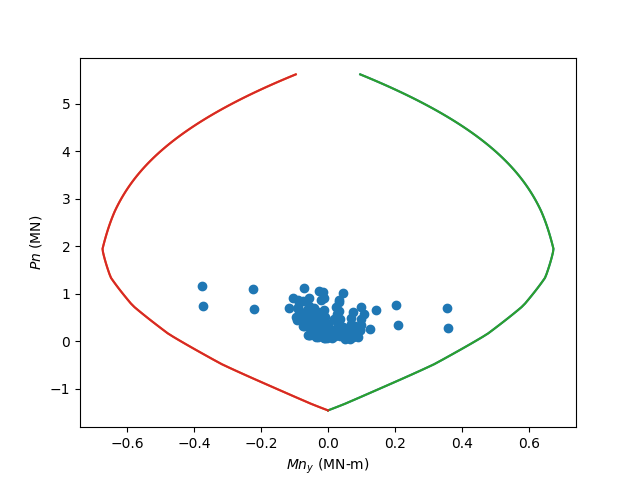

In [25]:
#Diagrama en el eje y  
fig, ax = plt.subplots()
ax.plot(Mn_y_may/10**6, Pn_y_may/10**6)
ax.plot(-Mn_y_may/10**6, Pn_y_may/10**6)
ax.plot(Mn_y_may/10**6, Pn_y_may/10**6)
ax.plot(-Mn_y_may/10**6, Pn_y_may/10**6)
ax.scatter(cargas['M3']/10**6,cargas['P']*-1/10**6)
ax.set_xlabel("$Mn_y$ (MN-m)")
ax.set_ylabel("$Pn$ (MN)")
plt.show()

In [27]:
#Momentos Probables
data = column.biaxial_f_c
data = data[data.theta==0]
data = data[abs(data.Pn-P_min)== min(abs(data.Pn-P_min))]

P_max = cargas['P'].min()
i = column.find_i(Pn_x_may,P_max)
Mnx_des = Mn_x_may[i]
Pnx_des = Pn_x_may[i]

i = column.find_i(Pn_y_may,P_max)
Mny_des = Mn_y_may[i]
Pny_des = Pn_y_may[i]

In [28]:
#Cortantes ultimas por capacidad
hn1 = 1.95*m
hn2 = 2.1*m
Vux = 2*Mnx_des/hn2
Vuy = 2*Mny_des/hn1

In [29]:
#Cortante que toma el concreto:
phi_c =0.75 #factor de reduccion
#Direccion X
Y = abs(P_max)/(6*Ag)
Y = min(Y,0.05*fc)
Vcx1 = (0.17*lamb*(fc/MPa)**0.5*MPa+Y)*h*(b-r-d_st)
Vcx2 = (0.42*lamb*(fc/MPa)**0.5*MPa)*h*(b-r-d_st)
Vcx = min(Vcx1,Vcx2)
Vsx = (Vux-phi_c*Vcx)/phi_c
#Direccion Y
Vcy1 = (0.17*lamb*(fc/MPa)**0.5*MPa+Y)*b*(h-r-d_st)
Vcy2 = (0.42*lamb*(fc/MPa)**0.5*MPa)*b*(h-r-d_st)
Vcy = min(Vcy1,Vcy2)
Vsy = (Vuy-phi_c*Vcy)/phi_c

In [30]:
#Comprobacion de la sección transversal por cortante
Vumx = phi_c*(Vcx+0.66*(fc/MPa)**0.5*MPa*h*(b-r-d_st))
Vumy = phi_c*(Vcy+0.66*(fc/MPa)**0.5*MPa*b*(h-r-d_st))

if Vumx < Vux:
    print('Aumentar seccion')
else:
    print('OK')
    
if Vumy < Vuy:
    print('Aumentar seccion')
else:
    print('OK')

OK
OK


In [31]:
#Separación de estribos:
#Direccion X
n = 2
n2 = 0
theta = math.radians(45)
Ast = A_4*n+A_3*n2*math.cos(theta)
sx = Ast*fy*(h-r-d_st)/Vsy
sx*100

-55.36445713320989

In [32]:
#Direccion Y
n1 = 2
n2 = 4
n3 = 0
theta = math.radians(45)
Ast = A_4*n1+A_3*n2+A_3*n3*math.cos(theta)
sy = Ast*fy*(b-r-d_st)/Vsx
sy*100

-26.841423515091485

In [34]:
#Separacion minima
d_p = column.d_p
s = min(sx,sy,6*d_p,15*cm)
s

-0.5536445713320989

### Cortante que toma el acero considerando rótula en las vigas

In [ ]:
#Viga en el sentido Y:
bv1 = 25*cm
hv1 = 40*cm
dv1 = hv1 - 9*cm
As1 = 4*A_5
ln1 = 5.65*m-0.2*m
#Vigas en el sentido X
bv2 = 35*cm
hv2 = 55*cm
dv2 = hv2 - 6*cm
As2 = 2*A_6+2*A_5
As3 = 3*A_5
ln2 = 4.56*m-0.35*m
ln3 = 4*m-0.35*m

In [ ]:
#Momentos Probables en las vigas
#Sentido X
a1 = As1*1.25*fy/(0.85*fc*bv1)
Mpx = As1*1.25*fy*(dv1-a1/2)
Vux = 4*Mpx/(2*hn2)
#Sentido Y
a2 = As2*1.25*fy/(0.85*fc*bv2)
Mpy1 = As2*1.25*fy*(dv2-a2/2)
a3 = As3*1.25*fy/(0.85*fc*bv2)
Mpy2 = As3*1.25*fy*(dv2-a3/2)
Mpy = max(Mpy1,Mpy2)
Vuy = 2*Mpy/(2*hn2)

In [ ]:
#Cortantes producidos por las vigas en X
V2 = 2*Mpx/ln2
V1 = 2*Mpx/ln3
#Longitud de diseño de la columna en X
lc1 = 0.5*hn2+hv
#Cortante de la columna en el sentido X
Vcolx = 2*Mpx/lc1 + (V1+V2)*b/2/lc1
Vcolx

In [ ]:
#Cortantes producidos por la viga en Y
V3 = (Mpy1+Mpy2)/ln1
#Longitud de diseño de la columna en Y
lc2 = 0.5*hn1+hv2
#Cortante de la columna en el sentido Y
Vcoly = Mpy/lc2+V3*h/2/lc2
Vcoly

## Fuerza cortante en el Nudo:

In [ ]:
#Sentido X (dos vigas llegando al nudo)
T1 = As1*fy
T2 = T1
Vux = T1+T2-Vcolx
Vux

In [ ]:
#Sentido Y (una viga en el nudo)
T3 = As2*fy
Vuy = T3-Vcoly
Vuy

In [ ]:
#En nudos viga columna de porticos a momento especiales usamos un factor de:
phi_c = 0.85
fact = {'IA':1.7,
       'IB':1.3,
       'IC':1.3,
       'ID':1.0,
       'IIA':1.3,
       'IIB':1.0,
       'IIC':1.0,
       'IID':0.7}

#Análisis en X:
tipox = 'I' #columna continua
v_c = 'y' #continuidad de la viga después del nudo
if v_c == 'y':
    if bv2 >= 0.75*h:
        tipox += 'A'
    else:
        tipox += 'B'
else:
    if bv2 >= 0.75*h:
        tipox += 'C'
    else:
        tipox += 'D'
tipox

In [ ]:
#Análisis en Y:
tipoy = 'I' #columna continua
v_c = 'n' #continuidad de la viga después del nudo
if v_c == 'y':
    if bv2 >= 0.75*h:
        tipoy += 'A'
    else:
        tipoy += 'B'
else:
    if bv2 >= 0.75*h:
        tipoy += 'C'
    else:
        tipoy += 'D'
tipoy

In [ ]:
#Cortante que resiste el nudo direccion X
befx = min(bv1+b,bv1) #Ancho efectivo del nudo en X
Ajx = befx*b
phiVnx = phi_c*fact[tipox]*(fc/MPa)**0.5*MPa*Ajx
phiVnx

In [ ]:
#Cortante que resiste el nudo direccion X
befy = min(bv2+h,bv2) #Ancho efectivo del nudo en X
Ajy = befy*h
phiVny = phi_c*fact[tipoy]*(fc/MPa)**0.5*MPa*Ajy
phiVny

In [ ]:
#Propuesta al nudo en X
b = 40*cm
bv1 = 35*cm
fc = 28*MPa
befx = min(bv1+b,bv1)
Ajx = b*befx
phiVnx = phi_c*fact[tipox]*(fc/MPa)**0.5*MPa*Ajx
phiVnx